# Capstone Project - The Battle of the Neighborhoods

### 1. Introduction

New York City and Toronto are the financial capitals of their respective countries. In this project, I am going to explore their neighborhoods and find out the top 10 common venues for each neighborhoods. I will make the comparison between both neighborhoods by clustering analysis.

### 2. Data used

For this project, the following data is required: 
* A list of neighborhoods of New York City with its location
* A list of neighborhoods of Toronto with its location

To acquire the top 10 venues and categories of each neighborhood, Foursquare API is used.

In [1]:
import requests
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json # library to handle JSON files
print("Import finished")

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.5               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

### 2.1 Process New York Data

In [2]:
df_Newyork= pd.read_csv('NewYork.csv')
df_Newyork.head()

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,0,Bronx,Wakefield,40.894705,-73.847201
1,1,Bronx,Co-op City,40.874294,-73.829939
2,2,Bronx,Eastchester,40.887556,-73.827806
3,3,Bronx,Fieldston,40.895437,-73.905643
4,4,Bronx,Riverdale,40.890834,-73.912585


In [3]:
df_Newyork.shape

(306, 5)

In [4]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [153]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Newyork['Latitude'], df_Newyork['Longitude'], df_Newyork['Borough'], df_Newyork['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 2.2 Process Toronto Data 

In [7]:
df_Toronto= pd.read_csv('Toronto.csv')
df_Toronto.head()

,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [8]:
df_Toronto.shape

(103, 6)

In [9]:
address = 'Toronto City'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [10]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [14]:
#df_Toronto.insert(0, 'City', 'Toronto', allow_duplicates = False)
#df_Newyork.insert(0, 'City', 'NewYork', allow_duplicates = False)
DF_Merge= pd.concat([df_Toronto,df_Newyork], ignore_index=True)
DF_Merge.head()

,City,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,Toronto,0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Toronto,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,Toronto,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Toronto,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,Toronto,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [35]:
df_Newyork

,City,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,NewYork,0,Bronx,Wakefield,40.894705,-73.847201
1,NewYork,1,Bronx,Co-op City,40.874294,-73.829939
2,NewYork,2,Bronx,Eastchester,40.887556,-73.827806
3,NewYork,3,Bronx,Fieldston,40.895437,-73.905643
4,NewYork,4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...,...,...
301,NewYork,301,Manhattan,Hudson Yards,40.756658,-74.000111
302,NewYork,302,Queens,Hammels,40.587338,-73.805530
303,NewYork,303,Queens,Bayswater,40.611322,-73.765968
304,NewYork,304,Queens,Queensbridge,40.756091,-73.945631


In [15]:
DF_Merge.shape

(409, 7)

### 2.3 Import Foursquare

In [20]:
CLIENT_ID = '0CXYAEK1YW2K1TLWGVCIWIOYONJJFY5PWEDXS1DROQ0SXLKO' # your Foursquare ID
CLIENT_SECRET = 'LRNMXPJWREUIFQ13KFEPGGXDX41B41MILCD40BJ0QOPQK5I5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
Both_venues = getNearbyVenues(names=DF_Merge['Neighborhood'],
                                   latitudes=DF_Merge['Latitude'],
                                   longitudes=DF_Merge['Longitude']
                                )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [24]:
Both_onehot = pd.get_dummies(Both_venues[['Venue Category']], prefix="", prefix_sep="")
Both_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
Both_onehot.insert(loc=0, column='Neighborhood', value=Both_venues['Neighborhood'] )
Both_grouped = Both_onehot.groupby('Neighborhood').mean().reset_index()
Both_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Annadale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Both_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Both_neighborhoods_venues_sorted['Neighborhood'] = Both_grouped['Neighborhood']

for ind in np.arange(Both_grouped.shape[0]):
    Both_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Both_grouped.iloc[ind, :], num_top_venues)

Both_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Skating Rink,Latin American Restaurant,Falafel Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Pub,Pharmacy,Athletics & Sports,Coffee Shop,Event Space,Event Service,Ethiopian Restaurant
2,Allerton,Pizza Place,Supermarket,Chinese Restaurant,Department Store,Gas Station,Donut Shop,Fast Food Restaurant,Pharmacy,Fried Chicken Joint,Discount Store
3,Annadale,Pizza Place,Cosmetics Shop,American Restaurant,Sushi Restaurant,Park,Liquor Store,Train Station,Diner,Restaurant,Deli / Bodega
4,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Yoga Studio,Farm,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant


In [179]:
Both_neighborhoods_venues_sorted.shape

(396, 11)

In [183]:

test= Both_neighborhoods_venues_sorted['Neighborhood'].unique()
test.shape

(396,)

In [168]:
Both_grouped.to_csv('Both_grouped.csv')
Both_neighborhoods_venues_sorted.to_csv('Both_neighborhoods_venues_sorted.csv')

## 3. Clustering of Neighborhoods

In [166]:
# set number of clusters
kclusters = 5
Both_grouped_clustering = Both_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans_Both = KMeans(n_clusters=kclusters, random_state=0).fit(Both_grouped_clustering)
# add clustering labels
Both_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_Both.labels_)
Both_merged = DF_Merge
# merge toronto_grouped with Both_data to add latitude/longitude for each neighborhood
Both_merged = Both_merged.join(Both_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Both_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
Both_merged["Cluster Labels"]= Both_merged["Cluster Labels"].astype(int) 
Both_merged= Both_merged.drop('Unnamed: 0', axis=1)
Both_merged= Both_merged.drop('PostalCode', axis=1)
Both_merged.head()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,Fast Food Restaurant,Yoga Studio,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
1,Toronto,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4,Bar,Yoga Studio,Farmers Market,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit
2,Toronto,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Breakfast Spot,Electronics Store,Intersection,Bank,Restaurant,Rental Car Location,Mexican Restaurant,Medical Center,Exhibit,Factory
3,Toronto,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Korean Restaurant,Yoga Studio,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
4,Toronto,Scarborough,Cedarbrae,43.773136,-79.239476,0,Fried Chicken Joint,Gas Station,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Athletics & Sports,Bakery,Bank,Financial or Legal Service,Event Space


In [145]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Both_merged['Latitude'], Both_merged['Longitude'], Both_merged['Neighborhood'], Both_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Analysis

### Visualize Number of Cluster by Cities

In [28]:
cluster=Both_merged[['Cluster Labels','City','Neighborhood']]
cluster_count= cluster.groupby(['Cluster Labels','City']).count()
cluster_count= cluster_count.add_suffix('_Count').reset_index()

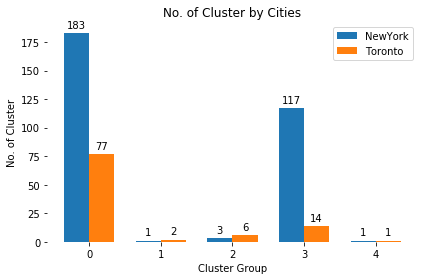

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels =  cluster_count['Cluster Labels'].unique()
NewYork = cluster_count['Neighborhood_Count'].loc[cluster_count['City']== 'NewYork'] 
Toronto = cluster_count['Neighborhood_Count'].loc[cluster_count['City']== 'Toronto'] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NewYork, width, label='NewYork')
rects2 = ax.bar(x + width/2, Toronto, width, label='Toronto')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Cluster')
ax.set_xlabel('Cluster Group')
ax.set_title('No. of Cluster by Cities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for spine in ax.spines:
    ax.spines[spine].set_visible(False)        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Calculate most common venue categories by each cluster

In [147]:
#Cluster 0
Cluster_Venue= Both_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].loc[Both_merged['Cluster Labels']== 0]
df = pd.DataFrame()
for i in Cluster_Venue['1st Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['2nd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['3rd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['4th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['5th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['6th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['7th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['8th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['9th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['10th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True) 
df.insert(1, 'Count', 1, allow_duplicates = False)
Cluster0= df.groupby(['Venue']).sum()
Cluster0= Cluster0.reset_index()
Cluster0= Cluster0.sort_values(by='Count', ascending=False)
Cluster0.insert(1, 'Percentage%', Cluster0['Count']/Cluster0['Count'].mean(), allow_duplicates = True)
Cluster0[['Venue','Percentage%']].head(10)

,Venue,Percentage%
63,Coffee Shop,12.253846
220,Pizza Place,7.488462
211,Park,7.488462
20,Bakery,7.488462
52,Café,7.261538
243,Sandwich Place,7.148077
160,Italian Restaurant,7.034615
294,Yoga Studio,6.694231
22,Bar,6.353846
95,English Restaurant,4.878846


In [148]:
#Cluster 1
Cluster_Venue= Both_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].loc[Both_merged['Cluster Labels']== 1]
df = pd.DataFrame()
for i in Cluster_Venue['1st Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['2nd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['3rd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['4th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['5th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['6th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['7th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['8th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['9th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['10th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True) 
df.insert(1, 'Count', 1, allow_duplicates = False)
Cluster1= df.groupby(['Venue']).sum()
Cluster1= Cluster1.reset_index()
Cluster1= Cluster1.sort_values(by='Count', ascending=False)
Cluster1.insert(1, 'Percentage%', Cluster1['Count']/Cluster1['Count'].mean(), allow_duplicates = True)
Cluster1[['Venue','Percentage%']].head(10)

,Venue,Percentage%
1,Electronics Store,1.100000
2,Empanada Restaurant,1.100000
3,English Restaurant,1.100000
4,Entertainment Service,1.100000
5,Ethiopian Restaurant,1.100000
6,Event Service,1.100000
7,Farm,1.100000
9,Playground,1.100000
10,Yoga Studio,1.100000
0,Egyptian Restaurant,0.733333


In [149]:
#Cluster 2
Cluster_Venue= Both_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].loc[Both_merged['Cluster Labels']== 2]
df = pd.DataFrame()
for i in Cluster_Venue['1st Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['2nd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['3rd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['4th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['5th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['6th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['7th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['8th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['9th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['10th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True) 
df.insert(1, 'Count', 1, allow_duplicates = False)
Cluster2= df.groupby(['Venue']).sum()
Cluster2= Cluster2.reset_index()
Cluster2= Cluster2.sort_values(by='Count', ascending=False)
Cluster2.insert(1, 'Percentage%', Cluster2['Count']/Cluster2['Count'].mean(), allow_duplicates = True)
Cluster2[['Venue','Percentage%']].head(10)

,Venue,Percentage%
21,Park,2.800000
9,English Restaurant,2.800000
8,Empanada Restaurant,2.488889
10,Entertainment Service,2.488889
11,Ethiopian Restaurant,2.177778
27,Yoga Studio,1.866667
12,Event Service,1.866667
7,Electronics Store,1.866667
15,Farm,1.555556
5,Convenience Store,1.555556


In [150]:
#Cluster 3
Cluster_Venue= Both_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].loc[Both_merged['Cluster Labels']== 3]
df = pd.DataFrame()
for i in Cluster_Venue['1st Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['2nd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['3rd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['4th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['5th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['6th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['7th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['8th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['9th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['10th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True) 
df.insert(1, 'Count', 1, allow_duplicates = False)
Cluster3= df.groupby(['Venue']).sum()
Cluster3= Cluster3.reset_index()
Cluster3= Cluster3.sort_values(by='Count', ascending=False)
Cluster3.insert(1, 'Percentage%', Cluster3['Count']/Cluster3['Count'].mean(), allow_duplicates = True)
Cluster3[['Venue','Percentage%']].head(10)

,Venue,Percentage%
147,Pizza Place,15.940458
45,Deli / Bodega,9.173282
146,Pharmacy,7.819847
39,Chinese Restaurant,7.368702
9,Bank,5.714504
91,Grocery Store,5.714504
159,Sandwich Place,5.564122
52,Donut Shop,5.263359
176,Supermarket,4.812214
106,Italian Restaurant,4.511450


In [151]:
#Cluster 4
Cluster_Venue= Both_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].loc[Both_merged['Cluster Labels']== 4]
df = pd.DataFrame()
for i in Cluster_Venue['1st Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['2nd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['3rd Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)
for i in Cluster_Venue['4th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['5th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['6th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['7th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['8th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['9th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True)    
for i in Cluster_Venue['10th Most Common Venue']:
    df= df.append({'Venue': i}, ignore_index=True) 
df.insert(1, 'Count', 1, allow_duplicates = False)
Cluster4= df.groupby(['Venue']).sum()
Cluster4= Cluster4.reset_index()
Cluster4= Cluster4.sort_values(by='Count', ascending=False)
Cluster4.insert(1, 'Percentage%', Cluster4['Count']/Cluster4['Count'].mean(), allow_duplicates = True)
Cluster4[['Venue','Percentage%']].head(10)

,Venue,Percentage%
0,Bar,1.0
1,Empanada Restaurant,1.0
2,English Restaurant,1.0
3,Entertainment Service,1.0
4,Ethiopian Restaurant,1.0
5,Event Service,1.0
6,Event Space,1.0
7,Exhibit,1.0
8,Farmers Market,1.0
9,Yoga Studio,1.0


Based on the result above, regardless of New York and Toronto, most common venues of neighborhoods are categorized into Cluster 0 and Cluster 3. 

In cluster 0, New York has 183 venues and Toronto has 77 venues; In cluster 3, New York has 117 venues and Toronto has 14 venues. In other clusters, New York and Toronto only has less than 10 venues. 

In Cluster 0, Coffee Shop are the most common venues which cover 12.25%; In Cluster 3, Pizza Place is the most common venues which cover 15.94%.


## 5. Conclusion

In this project, I have categorized neighborhoods of New York City and Toronto into 5 clusters. The results show the most common venues for each cluster. Such analysis can help people to identify what venues the people in the financial capital: New York City and Toronto are most likely to go. 